![](https://media.giphy.com/media/dWryx4eltxMMEXOIzi/giphy.gif)

### Motivation

The Superbowl is consistently the most watched primetime event on cable television and playing in the Superbowl comes not only with a title but also with a hefty bonus
Spotrac.com is a sports database that gathers varying salary’s in sports stating with when a player enter any professional league 
I am interested in studying varying factors that maximize a rookie’s initial salary when they enter the NFL including the implementation of new salary guidelines and the team a rookie signs with


### Research Questions: 
1. Does the length of a contract and the team a rookie signs to have an effect on total contract value?

2. How did the 2011 CBA effect average contract factors effect contract values when a player enters the NFL? What other draft and contracts factors effect total contract value?


### Part 1: Data Gathering and Cleaning from Spotrac

In [1]:
path = '/Users/mckennamoore/Desktop/ECO 590/590 Final Files/'

In [2]:
path

'/Users/mckennamoore/Desktop/Thesis Work/590 Final Files TO SUBMIT/'

In [3]:
import requests 
import numpy as np
import pandas as pd
import pprint
import ratelim
import tenacity
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from time import sleep
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from cookies import Cookie, Cookie
from flask import Flask, session
from flask import request
from requests.auth import HTTPBasicAuth
from IPython.core.display import display,HTML

### Login Information

In [4]:
#set webdriver
driver = webdriver.Chrome("/Users/mckennamoore/Downloads/chromedrive_mac64(01)/chromedriver") 
#website username
#website password
#website login page
url = "https://www.spotrac.com/signin/" 
#get request to establish connection with timebreak 
driver.get(url) 
driver.set_page_load_timeout(70)
#tells website that for the key associated with the value'email' I want to fill in my username 
driver.find_element("id", "email").send_keys(username) 
#tells website that for the key assoicated with the value 'password' I want to fill in my password
driver.find_element("id", "password").send_keys(password)

#page load wait time
driver.implicitly_wait(20) 

#define if there is a popup on the login page before clicking the login button and if so, close the pop up
if EC.presence_of_element_located(driver.find_element(By.XPATH, '//*[@id="PopupSignupForm_0"]/div[2]/div[1]')):
    print("Pop_up Occured")
    driver.find_element(By.XPATH, '//*[@id="PopupSignupForm_0"]/div[2]/div[1]').click()
else: 
    print("No pop_up")

#click login button associated with XPATH that has the assigned login function
driver.find_element(By.XPATH,'//*[@id="contactForm"]/div[2]/input').click()


driver.set_page_load_timeout(70)

#once logged in confirm that I have authoirzation for the data I am accessing because it is paid data
response = requests.get('https://www.spotrac.com/signin',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

#perform final get request
driver.get("https://www.spotrac.com")

/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/2076746883.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/mckennamoore/Downloads/chromedrive_mac64(01)/chromedriver")


Pop_up Occured


### 2005 Cookie Login

##### I used 2005 as a template for all of my future years. This profess was repeated 13 times, changing the cookie and dimensions of matrix as needed when draft pool sizes changed. Each year has an indidvudal cookie.

In [4]:
#get request to confirm access to the 2005 data that is behind a login screen and the data is paid data
response = requests.get('https://www.spotrac.com/nfl/draft/2005',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))
  
# print request object
print(response)


<Response [200]>


In [6]:
driver.quit()

### 2005 Data Gathering

In [5]:
response = requests.get('https://www.spotrac.com/nfl/draft/2005',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

#my cookie associated with 2005 data page: since each person has their own cookie each page will require a different cookie specific to your own computer
cook = 'MCPopupClosed=yes; _pubcid=1d9df9b7-6374-44ff-8a17-d235c022a3a4; __gads=ID=5f859f8ef6e06ee1:T=1677960959:S=ALNI_MZsKQvl7cGWIZ6VmzZdyBYDtkkcfA; __gpi=UID=000009c91d4fbac5:T=1677960959:RT=1679622759:S=ALNI_Manm4jQaX96uC_NavaNE0DIONzWvg; cto_bundle=1wI1J19BUXc4V05xUk5yNWgzUXI0clBqb1ZOTGdRVjRXTU9TY2Y1a3paZ2Vma1VEN0hzSThObWxjUmNZbFV0SzBTUEdFJTJCWkRpZnlLQ0VIemtnRkN2QXhTNnJzYjFnU1BDZG5PVlR2Y3lMcEN5dTFwTzZ0WDBwNVpHSFM2OXloUUZISyUyQnFxa0NUdFVKNzlwZnRrWldZbllqM1E0QUN4OG1JJTJGSDVtY2p1V09obGRpRUNsdEN1bklORDI1YkM2MFlkcHVlaHg; pbjs-unifiedid={"TDID":"0e685b6c-f548-4fed-820c-78d35f19802d","TDID_LOOKUP":"TRUE","TDID_CREATED_AT":"2023-02-28T14:54:48"}; id5id.1st={"created_at":"2023-03-01T00:47:23.464Z","id5_consent":true,"original_uid":"ID5*YA-DB605gDkzMFjJKsf0e_ZfoKX9ctHMDOE7nJUBwqJBOj_hANyvHXJy-92FFgyxQbaKRs149mwyIiLU7zQtog","universal_uid":"ID5*LNAZyRUbUbA8PcuGPn1qdRDT-Ju0GuM0IRWt-_6BvVVBOtsrUYr4saRpOt_bWPxVQbbBfS-dOFoK9q03lTvwkw","signature":"ID5_An0b2kCKRcFtft7tF7xqvm5ee3t4Zh5Qj2HqgXJwUYX8Rf0in0D4RgDz3cLxDeRR7DATi5T5sjZdif8T1Z4AyARGF8JtQRNEIERDkRkXtyoyeooIjZlAPSU","link_type":2,"cascade_needed":false,"privacy":{"jurisdiction":"other","id5_consent":true}}; id5id.1st_last=Thu, 30 Mar 2023 14:54:48 GMT; _ga_2D9VKDSRRM=GS1.1.1680188087.1.0.1680188091.0.0.0; _gid=GA1.2.1353578524.1683065748; _gat=1; _lr_geo_location=US; _lr_geo_location_state=NY; _lr_drop_match_pixel=true; _gali=contactForm; PHPSESSID=nsq9inm3708miqadv8kli99bvasam2c4_premium; _pbjs_userid_consent_data=3524755945110770; _lr_retry_request=true; _lr_env_src_ats=false; _ga_3ZZTGEXZ3B=GS1.1.1683065748.30.1.1683065749.0.0.0; _ga=GA1.1.1839831225.1677631623'
link = 'https://www.spotrac.com/nfl/draft/2005'

#access the cookie associated with the preoutlined page
session = requests.Session()
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie',cook)
session.cookies = jar
soup = BeautifulSoup(session.get(link).text, 'html.parser')

In [7]:
#find all values in dictionary with key class and value player which is the name of the value 
allplayers= soup.find_all('td', {'class':'player'}) 
#turn accessed values into a dataframe
allplayers_table= pd.DataFrame(allplayers) 
#rename column titles
allplayers_table.columns='Pick Number','Player Name','Empty' 
#ensure that the names of players, which is the targeted variable for this webscrape, 
    # is a string variable joined first by a comma then by a space
allplayers_table['Player Name']= allplayers_table['Player Name'].str.join(', ') 
#find all values in dictionary with key class and value assiated with center
year= soup.find_all('td', {'class':'center'}) 
 #turn these values into a matrix
year_matrix=np.matrix(year)
#set the dimensions of the matric based on how many columns there are and how many rows of information 
    # (number of players) are in a specified year
years=np.reshape(year_matrix,(254,10)) 
#turn this matrix into a dataframe
year_df=pd.DataFrame(years) 
#drop undesired columns
year_df.columns='Team','Position','Age','Height','Weight','College','Contract Length','Total Contract Value','Signing Bonus','Rookie Year Cap' #rename each of the columns so it is easier to clean
contract = year_df.drop(['Height','Team','Weight'],1) 
contract['Position']= contract['Position'].str.join(', ') 
#turn all values in column 'position' into a string variable
contract['Age']= contract['Age'].str.join(', ')
#turn all values in column 'college' into a string variable
contract['College']= contract['College'].str.join(', ') 
#turn all values in column 'contract length' into string variable
contract['Contract Length']= contract['Contract Length'].str.join(', ') 
#turn all values in 'total contract value' into string
contract['Total Contract Value']= contract['Total Contract Value'].str.join(', ') 
#turn all values in 'signing bonus' into string
contract['Signing Bonus']= contract['Signing Bonus'].str.join(', ') 
#turn all values in 'rookie year cap' into string
contract['Rookie Year Cap']= contract['Rookie Year Cap'].str.join(', ') 
#define 'player_contracts' as the data frame with both data frames
player_contracts =[allplayers_table,contract] 
#merge both data frames horizontally
player_contracts = pd.concat(player_contracts, axis=1) 
#drop unwanted columns
player_contracts05 = player_contracts.drop(['Empty','Pick Number'],1) 


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_9582/3182234878.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-o

### 2006

In [9]:
response = requests.get('https://www.spotrac.com/nfl/draft/2006',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

cook = 'MCPopupClosed=yes; _pubcid=1d9df9b7-6374-44ff-8a17-d235c022a3a4; __gads=ID=5f859f8ef6e06ee1:T=1677960959:S=ALNI_MZsKQvl7cGWIZ6VmzZdyBYDtkkcfA; __gpi=UID=000009c91d4fbac5:T=1677960959:RT=1679622759:S=ALNI_Manm4jQaX96uC_NavaNE0DIONzWvg; cto_bundle=1wI1J19BUXc4V05xUk5yNWgzUXI0clBqb1ZOTGdRVjRXTU9TY2Y1a3paZ2Vma1VEN0hzSThObWxjUmNZbFV0SzBTUEdFJTJCWkRpZnlLQ0VIemtnRkN2QXhTNnJzYjFnU1BDZG5PVlR2Y3lMcEN5dTFwTzZ0WDBwNVpHSFM2OXloUUZISyUyQnFxa0NUdFVKNzlwZnRrWldZbllqM1E0QUN4OG1JJTJGSDVtY2p1V09obGRpRUNsdEN1bklORDI1YkM2MFlkcHVlaHg; pbjs-unifiedid={"TDID":"0e685b6c-f548-4fed-820c-78d35f19802d","TDID_LOOKUP":"TRUE","TDID_CREATED_AT":"2023-02-28T14:54:48"}; id5id.1st={"created_at":"2023-03-01T00:47:23.464Z","id5_consent":true,"original_uid":"ID5*YA-DB605gDkzMFjJKsf0e_ZfoKX9ctHMDOE7nJUBwqJBOj_hANyvHXJy-92FFgyxQbaKRs149mwyIiLU7zQtog","universal_uid":"ID5*LNAZyRUbUbA8PcuGPn1qdRDT-Ju0GuM0IRWt-_6BvVVBOtsrUYr4saRpOt_bWPxVQbbBfS-dOFoK9q03lTvwkw","signature":"ID5_An0b2kCKRcFtft7tF7xqvm5ee3t4Zh5Qj2HqgXJwUYX8Rf0in0D4RgDz3cLxDeRR7DATi5T5sjZdif8T1Z4AyARGF8JtQRNEIERDkRkXtyoyeooIjZlAPSU","link_type":2,"cascade_needed":false,"privacy":{"jurisdiction":"other","id5_consent":true}}; id5id.1st_last=Thu, 30 Mar 2023 14:54:48 GMT; _ga_2D9VKDSRRM=GS1.1.1680188087.1.0.1680188091.0.0.0; _gid=GA1.2.1353578524.1683065748; _lr_geo_location=US; _lr_geo_location_state=NY; _lr_drop_match_pixel=true; PHPSESSID=nsq9inm3708miqadv8kli99bvasam2c4_premium; _pbjs_userid_consent_data=3524755945110770; _lr_retry_request=true; _lr_env_src_ats=false; _gat=1; _ga_3ZZTGEXZ3B=GS1.1.1683068359.31.1.1683068368.0.0.0; _ga=GA1.2.1839831225.1677631623'
link = 'https://www.spotrac.com/nfl/draft/2006'

session = requests.Session()
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie',cook)
session.cookies = jar
soup2006 = BeautifulSoup(session.get(link).text, 'html.parser')

allplayers= soup2006.find_all('td', {'class':'player'})
allplayers2006= pd.DataFrame(allplayers)
allplayers2006
allplayers2006.columns='Pick Number','Player Name','Empty'
allplayers2006['Player Name']= allplayers2006['Player Name'].str.join(', ')
allplayers2006 = allplayers2006.drop(['Empty'],1)
year= soup2006.find_all('td', {'class':'center'})
year_matrix=np.matrix(year) 
years=np.reshape(year_matrix,(254,10)) 
year_df=pd.DataFrame(years)
year_df.columns='Team','Position','Age','Height','Weight','College','Contract Length','Total Contract Value','Signing Bonus','Rookie Year Cap' 
contract = year_df.drop(['Height','Team','Weight'],1) 
contract['Position']= contract['Position'].str.join(', ') 
contract['Age']= contract['Age'].str.join(', ')
contract['College']= contract['College'].str.join(', ') 
contract['Contract Length']= contract['Contract Length'].str.join(', ') 
contract['Total Contract Value']= contract['Total Contract Value'].str.join(', ') 
contract['Signing Bonus']= contract['Signing Bonus'].str.join(', ') 
contract['Rookie Year Cap']= contract['Rookie Year Cap'].str.join(', ') 
player_contracts=[allplayers2006,contract]
player_contracts= pd.concat(player_contracts, axis=1)
player_contracts06 = player_contracts.drop(['Pick Number'],1)



/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/189910994.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  allplayers2006 = allplayers2006.drop(['Empty'],1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the

### 2007

In [10]:
response = requests.get('https://www.spotrac.com/nfl/draft/2007',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

cook = 'MCPopupClosed=yes; _pubcid=1d9df9b7-6374-44ff-8a17-d235c022a3a4; __gads=ID=5f859f8ef6e06ee1:T=1677960959:S=ALNI_MZsKQvl7cGWIZ6VmzZdyBYDtkkcfA; __gpi=UID=000009c91d4fbac5:T=1677960959:RT=1679622759:S=ALNI_Manm4jQaX96uC_NavaNE0DIONzWvg; cto_bundle=1wI1J19BUXc4V05xUk5yNWgzUXI0clBqb1ZOTGdRVjRXTU9TY2Y1a3paZ2Vma1VEN0hzSThObWxjUmNZbFV0SzBTUEdFJTJCWkRpZnlLQ0VIemtnRkN2QXhTNnJzYjFnU1BDZG5PVlR2Y3lMcEN5dTFwTzZ0WDBwNVpHSFM2OXloUUZISyUyQnFxa0NUdFVKNzlwZnRrWldZbllqM1E0QUN4OG1JJTJGSDVtY2p1V09obGRpRUNsdEN1bklORDI1YkM2MFlkcHVlaHg; pbjs-unifiedid={"TDID":"0e685b6c-f548-4fed-820c-78d35f19802d","TDID_LOOKUP":"TRUE","TDID_CREATED_AT":"2023-02-28T14:54:48"}; id5id.1st={"created_at":"2023-03-01T00:47:23.464Z","id5_consent":true,"original_uid":"ID5*YA-DB605gDkzMFjJKsf0e_ZfoKX9ctHMDOE7nJUBwqJBOj_hANyvHXJy-92FFgyxQbaKRs149mwyIiLU7zQtog","universal_uid":"ID5*LNAZyRUbUbA8PcuGPn1qdRDT-Ju0GuM0IRWt-_6BvVVBOtsrUYr4saRpOt_bWPxVQbbBfS-dOFoK9q03lTvwkw","signature":"ID5_An0b2kCKRcFtft7tF7xqvm5ee3t4Zh5Qj2HqgXJwUYX8Rf0in0D4RgDz3cLxDeRR7DATi5T5sjZdif8T1Z4AyARGF8JtQRNEIERDkRkXtyoyeooIjZlAPSU","link_type":2,"cascade_needed":false,"privacy":{"jurisdiction":"other","id5_consent":true}}; id5id.1st_last=Thu, 30 Mar 2023 14:54:48 GMT; _ga_2D9VKDSRRM=GS1.1.1680188087.1.0.1680188091.0.0.0; _gid=GA1.2.1353578524.1683065748; _lr_geo_location=US; _lr_geo_location_state=NY; _lr_drop_match_pixel=true; PHPSESSID=nsq9inm3708miqadv8kli99bvasam2c4_premium; _pbjs_userid_consent_data=3524755945110770; _lr_retry_request=true; _lr_env_src_ats=false; _ga_3ZZTGEXZ3B=GS1.1.1683068359.31.1.1683068793.0.0.0; _ga=GA1.2.1839831225.1677631623; _gat=1'
link = 'https://www.spotrac.com/nfl/draft/2007'

session = requests.Session()
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie',cook)
session.cookies = jar
soup2007 = BeautifulSoup(session.get(link).text, 'html.parser')

player = soup2007.find('td', {'class':'player'})
allplayers= soup2007.find_all('td', {'class':'player'})
allplayers2007= pd.DataFrame(allplayers)
allplayers2007
allplayers2007.columns='Pick Number','Player Name','Empty'
allplayers2007['Player Name']= allplayers2007['Player Name'].str.join(', ')
allplayers2007 = allplayers2007.drop(['Empty'],1)
year= soup2007.find_all('td', {'class':'center'}) 
year_matrix=np.matrix(year) 
years=np.reshape(year_matrix,(255,10)) 
year_df=pd.DataFrame(years) 
year_df.columns='Team','Position','Age','Height','Weight','College','Contract Length','Total Contract Value','Signing Bonus','Rookie Year Cap' 
contract = year_df.drop(['Height','Team','Weight'],1) 
contract['Position']= contract['Position'].str.join(', ') 
contract['Age']= contract['Age'].str.join(', ')
contract['College']= contract['College'].str.join(', ')
contract['Contract Length']= contract['Contract Length'].str.join(', ')
contract['Total Contract Value']= contract['Total Contract Value'].str.join(', ') 
contract['Signing Bonus']= contract['Signing Bonus'].str.join(', ') 
contract['Rookie Year Cap']= contract['Rookie Year Cap'].str.join(', ') 
player_contracts=[allplayers2007,contract]
player_contracts= pd.concat(player_contracts, axis=1)
player_contracts07 = player_contracts.drop(['Pick Number'],1)


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/2263544103.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  allplayers2007 = allplayers2007.drop(['Empty'],1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating th

### 2008

In [11]:
response = requests.get('https://www.spotrac.com/nfl/draft/2008',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

print(response)
response = requests.get('https://www.spotrac.com/nfl/draft/2008',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

cook = 'MCPopupClosed=yes; _pubcid=1d9df9b7-6374-44ff-8a17-d235c022a3a4; __gads=ID=5f859f8ef6e06ee1:T=1677960959:S=ALNI_MZsKQvl7cGWIZ6VmzZdyBYDtkkcfA; __gpi=UID=000009c91d4fbac5:T=1677960959:RT=1679622759:S=ALNI_Manm4jQaX96uC_NavaNE0DIONzWvg; cto_bundle=1wI1J19BUXc4V05xUk5yNWgzUXI0clBqb1ZOTGdRVjRXTU9TY2Y1a3paZ2Vma1VEN0hzSThObWxjUmNZbFV0SzBTUEdFJTJCWkRpZnlLQ0VIemtnRkN2QXhTNnJzYjFnU1BDZG5PVlR2Y3lMcEN5dTFwTzZ0WDBwNVpHSFM2OXloUUZISyUyQnFxa0NUdFVKNzlwZnRrWldZbllqM1E0QUN4OG1JJTJGSDVtY2p1V09obGRpRUNsdEN1bklORDI1YkM2MFlkcHVlaHg; pbjs-unifiedid={"TDID":"0e685b6c-f548-4fed-820c-78d35f19802d","TDID_LOOKUP":"TRUE","TDID_CREATED_AT":"2023-02-28T14:54:48"}; id5id.1st={"created_at":"2023-03-01T00:47:23.464Z","id5_consent":true,"original_uid":"ID5*YA-DB605gDkzMFjJKsf0e_ZfoKX9ctHMDOE7nJUBwqJBOj_hANyvHXJy-92FFgyxQbaKRs149mwyIiLU7zQtog","universal_uid":"ID5*LNAZyRUbUbA8PcuGPn1qdRDT-Ju0GuM0IRWt-_6BvVVBOtsrUYr4saRpOt_bWPxVQbbBfS-dOFoK9q03lTvwkw","signature":"ID5_An0b2kCKRcFtft7tF7xqvm5ee3t4Zh5Qj2HqgXJwUYX8Rf0in0D4RgDz3cLxDeRR7DATi5T5sjZdif8T1Z4AyARGF8JtQRNEIERDkRkXtyoyeooIjZlAPSU","link_type":2,"cascade_needed":false,"privacy":{"jurisdiction":"other","id5_consent":true}}; id5id.1st_last=Thu, 30 Mar 2023 14:54:48 GMT; _ga_2D9VKDSRRM=GS1.1.1680188087.1.0.1680188091.0.0.0; _gid=GA1.2.1353578524.1683065748; PHPSESSID=nsq9inm3708miqadv8kli99bvasam2c4_premium; _pbjs_userid_consent_data=3524755945110770; _lr_env_src_ats=false; _ga_3ZZTGEXZ3B=GS1.1.1683156024.33.1.1683156624.0.0.0; _ga=GA1.2.1839831225.1677631623'
link = 'https://www.spotrac.com/nfl/draft/2008'


session = requests.Session()
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie',cook)
session.cookies = jar

soup2008 = BeautifulSoup(session.get(link).text, 'html.parser')

player = soup2008.find('td', {'class':'player'})
allplayers= soup2008.find_all('td', {'class':'player'})
allplayers2008= pd.DataFrame(allplayers)
allplayers2008
allplayers2008.columns='Pick Number','Player Name','Empty'
allplayers2008['Player Name']= allplayers2008['Player Name'].str.join(', ')
allplayers2008 = allplayers2008.drop(['Empty'],1)
year= soup2008.find_all('td', {'class':'center'}) 
year_matrix=np.matrix(year) 
years=np.reshape(year_matrix,(252,10)) 
year_df=pd.DataFrame(years) 
year_df.columns='Team','Position','Age','Height','Weight','College','Contract Length','Total Contract Value','Signing Bonus','Rookie Year Cap' 
contract = year_df.drop(['Height','Team','Weight'],1) 
contract['Position']= contract['Position'].str.join(', ') 
contract['Age']= contract['Age'].str.join(', ')
contract['College']= contract['College'].str.join(', ') 
contract['Contract Length']= contract['Contract Length'].str.join(', ') 
contract['Total Contract Value']= contract['Total Contract Value'].str.join(', ') 
contract['Signing Bonus']= contract['Signing Bonus'].str.join(', ')
contract['Rookie Year Cap']= contract['Rookie Year Cap'].str.join(', ') 
player_contracts=[allplayers2008,contract]
player_contracts= pd.concat(player_contracts, axis=1)
player_contracts08 = player_contracts.drop(['Pick Number'],1)


<Response [200]>


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/3454039799.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  allplayers2008 = allplayers2008.drop(['Empty'],1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating th

### 2009

In [12]:
response = requests.get('https://www.spotrac.com/nfl/draft/2009',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))
  
print(response)
response = requests.get('https://www.spotrac.com/nfl/draft/2009',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

cook = 'MCPopupClosed=yes; _pubcid=1d9df9b7-6374-44ff-8a17-d235c022a3a4; __gads=ID=5f859f8ef6e06ee1:T=1677960959:S=ALNI_MZsKQvl7cGWIZ6VmzZdyBYDtkkcfA; __gpi=UID=000009c91d4fbac5:T=1677960959:RT=1679622759:S=ALNI_Manm4jQaX96uC_NavaNE0DIONzWvg; cto_bundle=1wI1J19BUXc4V05xUk5yNWgzUXI0clBqb1ZOTGdRVjRXTU9TY2Y1a3paZ2Vma1VEN0hzSThObWxjUmNZbFV0SzBTUEdFJTJCWkRpZnlLQ0VIemtnRkN2QXhTNnJzYjFnU1BDZG5PVlR2Y3lMcEN5dTFwTzZ0WDBwNVpHSFM2OXloUUZISyUyQnFxa0NUdFVKNzlwZnRrWldZbllqM1E0QUN4OG1JJTJGSDVtY2p1V09obGRpRUNsdEN1bklORDI1YkM2MFlkcHVlaHg; pbjs-unifiedid={"TDID":"0e685b6c-f548-4fed-820c-78d35f19802d","TDID_LOOKUP":"TRUE","TDID_CREATED_AT":"2023-02-28T14:54:48"}; id5id.1st={"created_at":"2023-03-01T00:47:23.464Z","id5_consent":true,"original_uid":"ID5*YA-DB605gDkzMFjJKsf0e_ZfoKX9ctHMDOE7nJUBwqJBOj_hANyvHXJy-92FFgyxQbaKRs149mwyIiLU7zQtog","universal_uid":"ID5*LNAZyRUbUbA8PcuGPn1qdRDT-Ju0GuM0IRWt-_6BvVVBOtsrUYr4saRpOt_bWPxVQbbBfS-dOFoK9q03lTvwkw","signature":"ID5_An0b2kCKRcFtft7tF7xqvm5ee3t4Zh5Qj2HqgXJwUYX8Rf0in0D4RgDz3cLxDeRR7DATi5T5sjZdif8T1Z4AyARGF8JtQRNEIERDkRkXtyoyeooIjZlAPSU","link_type":2,"cascade_needed":false,"privacy":{"jurisdiction":"other","id5_consent":true}}; id5id.1st_last=Thu, 30 Mar 2023 14:54:48 GMT; _ga_2D9VKDSRRM=GS1.1.1680188087.1.0.1680188091.0.0.0; _gid=GA1.2.1353578524.1683065748; _lr_geo_location=US; _lr_geo_location_state=NY; _lr_drop_match_pixel=true; PHPSESSID=nsq9inm3708miqadv8kli99bvasam2c4_premium; _pbjs_userid_consent_data=3524755945110770; _lr_env_src_ats=false; _ga_3ZZTGEXZ3B=GS1.1.1683068359.31.1.1683069228.0.0.0; _ga=GA1.2.1839831225.1677631623'
link = 'https://www.spotrac.com/nfl/draft/2009'

session = requests.Session()
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie',cook)
session.cookies = jar

soup2009 = BeautifulSoup(session.get(link).text, 'html.parser')
player = soup2009.find('td', {'class':'player'})
allplayers= soup2009.find_all('td', {'class':'player'})
allplayers2009= pd.DataFrame(allplayers)
allplayers2009.columns='Pick Number','Player Name','Empty'
allplayers2009['Player Name']= allplayers2009['Player Name'].str.join(', ')
allplayers2009 = allplayers2009.drop(['Empty'],1)

year= soup2009.find_all('td', {'class':'center'}) 
year_matrix=np.matrix(year) 
years=np.reshape(year_matrix,(252,10)) 
year_df=pd.DataFrame(years) 
year_df.columns='Team','Position','Age','Height','Weight','College','Contract Length','Total Contract Value','Signing Bonus','Rookie Year Cap' 
contract = year_df.drop(['Height','Team','Weight'],1) 
contract['Position']= contract['Position'].str.join(', ') 
contract['Age']= contract['Age'].str.join(', ')
contract['College']= contract['College'].str.join(', ') 
contract['Contract Length']= contract['Contract Length'].str.join(', ')
contract['Total Contract Value']= contract['Total Contract Value'].str.join(', ') 
contract['Signing Bonus']= contract['Signing Bonus'].str.join(', ') 
contract['Rookie Year Cap']= contract['Rookie Year Cap'].str.join(', ') 
player_contracts=[allplayers2009,contract]
player_contracts= pd.concat(player_contracts, axis=1)
player_contracts09 = player_contracts.drop(['Pick Number'],1)


<Response [200]>


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/827414737.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  allplayers2009 = allplayers2009.drop(['Empty'],1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the

### 2010

In [13]:
response = requests.get('https://www.spotrac.com/nfl/draft/2010',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))
  
print(response)
response = requests.get('https://www.spotrac.com/nfl/draft/2010',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

cook = 'MCPopupClosed=yes; _pubcid=1d9df9b7-6374-44ff-8a17-d235c022a3a4; __gads=ID=5f859f8ef6e06ee1:T=1677960959:S=ALNI_MZsKQvl7cGWIZ6VmzZdyBYDtkkcfA; __gpi=UID=000009c91d4fbac5:T=1677960959:RT=1679622759:S=ALNI_Manm4jQaX96uC_NavaNE0DIONzWvg; cto_bundle=1wI1J19BUXc4V05xUk5yNWgzUXI0clBqb1ZOTGdRVjRXTU9TY2Y1a3paZ2Vma1VEN0hzSThObWxjUmNZbFV0SzBTUEdFJTJCWkRpZnlLQ0VIemtnRkN2QXhTNnJzYjFnU1BDZG5PVlR2Y3lMcEN5dTFwTzZ0WDBwNVpHSFM2OXloUUZISyUyQnFxa0NUdFVKNzlwZnRrWldZbllqM1E0QUN4OG1JJTJGSDVtY2p1V09obGRpRUNsdEN1bklORDI1YkM2MFlkcHVlaHg; pbjs-unifiedid={"TDID":"0e685b6c-f548-4fed-820c-78d35f19802d","TDID_LOOKUP":"TRUE","TDID_CREATED_AT":"2023-02-28T14:54:48"}; id5id.1st={"created_at":"2023-03-01T00:47:23.464Z","id5_consent":true,"original_uid":"ID5*YA-DB605gDkzMFjJKsf0e_ZfoKX9ctHMDOE7nJUBwqJBOj_hANyvHXJy-92FFgyxQbaKRs149mwyIiLU7zQtog","universal_uid":"ID5*LNAZyRUbUbA8PcuGPn1qdRDT-Ju0GuM0IRWt-_6BvVVBOtsrUYr4saRpOt_bWPxVQbbBfS-dOFoK9q03lTvwkw","signature":"ID5_An0b2kCKRcFtft7tF7xqvm5ee3t4Zh5Qj2HqgXJwUYX8Rf0in0D4RgDz3cLxDeRR7DATi5T5sjZdif8T1Z4AyARGF8JtQRNEIERDkRkXtyoyeooIjZlAPSU","link_type":2,"cascade_needed":false,"privacy":{"jurisdiction":"other","id5_consent":true}}; id5id.1st_last=Thu, 30 Mar 2023 14:54:48 GMT; _ga_2D9VKDSRRM=GS1.1.1680188087.1.0.1680188091.0.0.0; _gid=GA1.2.1353578524.1683065748; _lr_geo_location=US; _lr_geo_location_state=NY; _lr_drop_match_pixel=true; PHPSESSID=nsq9inm3708miqadv8kli99bvasam2c4_premium; _pbjs_userid_consent_data=3524755945110770; _lr_env_src_ats=false; _ga_3ZZTGEXZ3B=GS1.1.1683068359.31.1.1683070245.0.0.0; _ga=GA1.2.1839831225.1677631623'
link = 'https://www.spotrac.com/nfl/draft/2010'

session = requests.Session()
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie',cook)
session.cookies = jar

soup2010 = BeautifulSoup(session.get(link).text, 'html.parser')
player = soup2010.find('td', {'class':'player'})
allplayers= soup2010.find_all('td', {'class':'player'})
allplayers2010= pd.DataFrame(allplayers)
allplayers2010.columns='Pick Number','Player Name','Empty'
allplayers2010['Player Name']= allplayers2010['Player Name'].str.join(', ')
allplayers2010 = allplayers2010.drop(['Empty'],1)

year= soup2010.find_all('td', {'class':'center'}) 
year_matrix=np.matrix(year) 
years=np.reshape(year_matrix,(251,10)) 
year_df=pd.DataFrame(years) 
year_df.columns='Team','Position','Age','Height','Weight','College','Contract Length','Total Contract Value','Signing Bonus','Rookie Year Cap' 
contract = year_df.drop(['Height','Team','Weight'],1) 
contract['Position']= contract['Position'].str.join(', ') 
contract['Age']= contract['Age'].str.join(', ')
contract['College']= contract['College'].str.join(', ') 
contract['Contract Length']= contract['Contract Length'].str.join(', ') 
contract['Total Contract Value']= contract['Total Contract Value'].str.join(', ') 
contract['Signing Bonus']= contract['Signing Bonus'].str.join(', ')
contract['Rookie Year Cap']= contract['Rookie Year Cap'].str.join(', ') 
player_contracts=[allplayers2010,contract]
player_contracts= pd.concat(player_contracts, axis=1)
player_contracts10 = player_contracts.drop(['Pick Number'],1)


<Response [200]>


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/1837877291.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  allplayers2010 = allplayers2010.drop(['Empty'],1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating th

### 2011

In [14]:
response = requests.get('https://www.spotrac.com/nfl/draft/2011',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))
  
print(response)
response = requests.get('https://www.spotrac.com/nfl/draft/2011',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

cook = 'MCPopupClosed=yes; _pubcid=1d9df9b7-6374-44ff-8a17-d235c022a3a4; __gads=ID=5f859f8ef6e06ee1:T=1677960959:S=ALNI_MZsKQvl7cGWIZ6VmzZdyBYDtkkcfA; __gpi=UID=000009c91d4fbac5:T=1677960959:RT=1679622759:S=ALNI_Manm4jQaX96uC_NavaNE0DIONzWvg; cto_bundle=1wI1J19BUXc4V05xUk5yNWgzUXI0clBqb1ZOTGdRVjRXTU9TY2Y1a3paZ2Vma1VEN0hzSThObWxjUmNZbFV0SzBTUEdFJTJCWkRpZnlLQ0VIemtnRkN2QXhTNnJzYjFnU1BDZG5PVlR2Y3lMcEN5dTFwTzZ0WDBwNVpHSFM2OXloUUZISyUyQnFxa0NUdFVKNzlwZnRrWldZbllqM1E0QUN4OG1JJTJGSDVtY2p1V09obGRpRUNsdEN1bklORDI1YkM2MFlkcHVlaHg; pbjs-unifiedid={"TDID":"0e685b6c-f548-4fed-820c-78d35f19802d","TDID_LOOKUP":"TRUE","TDID_CREATED_AT":"2023-02-28T14:54:48"}; id5id.1st={"created_at":"2023-03-01T00:47:23.464Z","id5_consent":true,"original_uid":"ID5*YA-DB605gDkzMFjJKsf0e_ZfoKX9ctHMDOE7nJUBwqJBOj_hANyvHXJy-92FFgyxQbaKRs149mwyIiLU7zQtog","universal_uid":"ID5*LNAZyRUbUbA8PcuGPn1qdRDT-Ju0GuM0IRWt-_6BvVVBOtsrUYr4saRpOt_bWPxVQbbBfS-dOFoK9q03lTvwkw","signature":"ID5_An0b2kCKRcFtft7tF7xqvm5ee3t4Zh5Qj2HqgXJwUYX8Rf0in0D4RgDz3cLxDeRR7DATi5T5sjZdif8T1Z4AyARGF8JtQRNEIERDkRkXtyoyeooIjZlAPSU","link_type":2,"cascade_needed":false,"privacy":{"jurisdiction":"other","id5_consent":true}}; id5id.1st_last=Thu, 30 Mar 2023 14:54:48 GMT; _ga_2D9VKDSRRM=GS1.1.1680188087.1.0.1680188091.0.0.0; _gid=GA1.2.1353578524.1683065748; _lr_geo_location=US; _lr_geo_location_state=NY; _lr_drop_match_pixel=true; PHPSESSID=nsq9inm3708miqadv8kli99bvasam2c4_premium; _pbjs_userid_consent_data=3524755945110770; _lr_env_src_ats=false; _ga_3ZZTGEXZ3B=GS1.1.1683068359.31.1.1683070352.0.0.0; _ga=GA1.2.1839831225.1677631623' 
link = 'https://www.spotrac.com/nfl/draft/2011'

session = requests.Session()
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie',cook)
session.cookies = jar

soup2011 = BeautifulSoup(session.get(link).text, 'html.parser')
player = soup2011.find('td', {'class':'player'})
allplayers= soup2011.find_all('td', {'class':'player'})
allplayers2011= pd.DataFrame(allplayers)
allplayers2011.columns='Pick Number','Player Name','Empty'
allplayers2011['Player Name']= allplayers2011['Player Name'].str.join(', ')
allplayers2011 = allplayers2011.drop(['Empty'],1)

year= soup2011.find_all('td', {'class':'center'})
year_matrix=np.matrix(year) 
years=np.reshape(year_matrix,(254,10))
year_df=pd.DataFrame(years)
year_df.columns='Team','Position','Age','Height','Weight','College','Contract Length','Total Contract Value','Signing Bonus','Rookie Year Cap' 
contract = year_df.drop(['Height','Team','Weight'],1) 
contract['Position']= contract['Position'].str.join(', ') 
contract['Age']= contract['Age'].str.join(', ')
contract['College']= contract['College'].str.join(', ') 
contract['Contract Length']= contract['Contract Length'].str.join(', ') 
contract['Total Contract Value']= contract['Total Contract Value'].str.join(', ') 
contract['Signing Bonus']= contract['Signing Bonus'].str.join(', ')
contract['Rookie Year Cap']= contract['Rookie Year Cap'].str.join(', ')
player_contracts=[allplayers2011,contract]
player_contracts= pd.concat(player_contracts, axis=1)
player_contracts11 = player_contracts.drop(['Pick Number'],1)


<Response [200]>


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/2400938625.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  allplayers2011 = allplayers2011.drop(['Empty'],1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating th

### 2012

In [15]:
response = requests.get('https://www.spotrac.com/nfl/draft/2012',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))
  
print(response)
response = requests.get('https://www.spotrac.com/nfl/draft/2012',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

cook = 'MCPopupClosed=yes; _pubcid=1d9df9b7-6374-44ff-8a17-d235c022a3a4; __gads=ID=5f859f8ef6e06ee1:T=1677960959:S=ALNI_MZsKQvl7cGWIZ6VmzZdyBYDtkkcfA; __gpi=UID=000009c91d4fbac5:T=1677960959:RT=1679622759:S=ALNI_Manm4jQaX96uC_NavaNE0DIONzWvg; cto_bundle=1wI1J19BUXc4V05xUk5yNWgzUXI0clBqb1ZOTGdRVjRXTU9TY2Y1a3paZ2Vma1VEN0hzSThObWxjUmNZbFV0SzBTUEdFJTJCWkRpZnlLQ0VIemtnRkN2QXhTNnJzYjFnU1BDZG5PVlR2Y3lMcEN5dTFwTzZ0WDBwNVpHSFM2OXloUUZISyUyQnFxa0NUdFVKNzlwZnRrWldZbllqM1E0QUN4OG1JJTJGSDVtY2p1V09obGRpRUNsdEN1bklORDI1YkM2MFlkcHVlaHg; pbjs-unifiedid={"TDID":"0e685b6c-f548-4fed-820c-78d35f19802d","TDID_LOOKUP":"TRUE","TDID_CREATED_AT":"2023-02-28T14:54:48"}; id5id.1st={"created_at":"2023-03-01T00:47:23.464Z","id5_consent":true,"original_uid":"ID5*YA-DB605gDkzMFjJKsf0e_ZfoKX9ctHMDOE7nJUBwqJBOj_hANyvHXJy-92FFgyxQbaKRs149mwyIiLU7zQtog","universal_uid":"ID5*LNAZyRUbUbA8PcuGPn1qdRDT-Ju0GuM0IRWt-_6BvVVBOtsrUYr4saRpOt_bWPxVQbbBfS-dOFoK9q03lTvwkw","signature":"ID5_An0b2kCKRcFtft7tF7xqvm5ee3t4Zh5Qj2HqgXJwUYX8Rf0in0D4RgDz3cLxDeRR7DATi5T5sjZdif8T1Z4AyARGF8JtQRNEIERDkRkXtyoyeooIjZlAPSU","link_type":2,"cascade_needed":false,"privacy":{"jurisdiction":"other","id5_consent":true}}; id5id.1st_last=Thu, 30 Mar 2023 14:54:48 GMT; _ga_2D9VKDSRRM=GS1.1.1680188087.1.0.1680188091.0.0.0; _gid=GA1.2.1353578524.1683065748; _lr_geo_location=US; _lr_geo_location_state=NY; _lr_drop_match_pixel=true; PHPSESSID=nsq9inm3708miqadv8kli99bvasam2c4_premium; _pbjs_userid_consent_data=3524755945110770; _lr_env_src_ats=false; _ga_3ZZTGEXZ3B=GS1.1.1683077322.32.1.1683077322.0.0.0; _ga=GA1.2.1839831225.1677631623; _gat=1'
link = 'https://www.spotrac.com/nfl/draft/2012'

session = requests.Session()
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie',cook)
session.cookies = jar

soup2012 = BeautifulSoup(session.get(link).text, 'html.parser')
player = soup2012.find('td', {'class':'player'})
allplayers= soup2012.find_all('td', {'class':'player'})
allplayers2012= pd.DataFrame(allplayers)
allplayers2012.columns='Pick Number','Player Name','Empty'
allplayers2012['Player Name']= allplayers2012['Player Name'].str.join(', ')
allplayers2012 = allplayers2012.drop(['Empty'],1)

year= soup2012.find_all('td', {'class':'center'})
year_matrix=np.matrix(year)
years=np.reshape(year_matrix,(253,10))
year_df=pd.DataFrame(years)
year_df.columns='Team','Position','Age','Height','Weight','College','Contract Length','Total Contract Value','Signing Bonus','Rookie Year Cap' 
contract = year_df.drop(['Height','Team','Weight'],1) 
contract['Position']= contract['Position'].str.join(', ') 
contract['Age']= contract['Age'].str.join(', ')
contract['College']= contract['College'].str.join(', ') 
contract['Contract Length']= contract['Contract Length'].str.join(', ') 
contract['Total Contract Value']= contract['Total Contract Value'].str.join(', ') 
contract['Signing Bonus']= contract['Signing Bonus'].str.join(', ') 
contract['Rookie Year Cap']= contract['Rookie Year Cap'].str.join(', ') 
player_contracts=[allplayers2012,contract]
player_contracts= pd.concat(player_contracts, axis=1)
player_contracts12 = player_contracts.drop(['Pick Number'],1)


<Response [200]>


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/843919221.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  allplayers2012 = allplayers2012.drop(['Empty'],1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the

### 2013

In [16]:
response = requests.get('https://www.spotrac.com/nfl/draft/2013',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))
  
print(response)
response = requests.get('https://www.spotrac.com/nfl/draft/2013',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

cook = 'MCPopupClosed=yes; _pubcid=1d9df9b7-6374-44ff-8a17-d235c022a3a4; __gads=ID=5f859f8ef6e06ee1:T=1677960959:S=ALNI_MZsKQvl7cGWIZ6VmzZdyBYDtkkcfA; __gpi=UID=000009c91d4fbac5:T=1677960959:RT=1679622759:S=ALNI_Manm4jQaX96uC_NavaNE0DIONzWvg; cto_bundle=1wI1J19BUXc4V05xUk5yNWgzUXI0clBqb1ZOTGdRVjRXTU9TY2Y1a3paZ2Vma1VEN0hzSThObWxjUmNZbFV0SzBTUEdFJTJCWkRpZnlLQ0VIemtnRkN2QXhTNnJzYjFnU1BDZG5PVlR2Y3lMcEN5dTFwTzZ0WDBwNVpHSFM2OXloUUZISyUyQnFxa0NUdFVKNzlwZnRrWldZbllqM1E0QUN4OG1JJTJGSDVtY2p1V09obGRpRUNsdEN1bklORDI1YkM2MFlkcHVlaHg; pbjs-unifiedid={"TDID":"0e685b6c-f548-4fed-820c-78d35f19802d","TDID_LOOKUP":"TRUE","TDID_CREATED_AT":"2023-02-28T14:54:48"}; id5id.1st={"created_at":"2023-03-01T00:47:23.464Z","id5_consent":true,"original_uid":"ID5*YA-DB605gDkzMFjJKsf0e_ZfoKX9ctHMDOE7nJUBwqJBOj_hANyvHXJy-92FFgyxQbaKRs149mwyIiLU7zQtog","universal_uid":"ID5*LNAZyRUbUbA8PcuGPn1qdRDT-Ju0GuM0IRWt-_6BvVVBOtsrUYr4saRpOt_bWPxVQbbBfS-dOFoK9q03lTvwkw","signature":"ID5_An0b2kCKRcFtft7tF7xqvm5ee3t4Zh5Qj2HqgXJwUYX8Rf0in0D4RgDz3cLxDeRR7DATi5T5sjZdif8T1Z4AyARGF8JtQRNEIERDkRkXtyoyeooIjZlAPSU","link_type":2,"cascade_needed":false,"privacy":{"jurisdiction":"other","id5_consent":true}}; id5id.1st_last=Thu, 30 Mar 2023 14:54:48 GMT; _ga_2D9VKDSRRM=GS1.1.1680188087.1.0.1680188091.0.0.0; _gid=GA1.2.1353578524.1683065748; _lr_geo_location=US; _lr_geo_location_state=NY; _lr_drop_match_pixel=true; PHPSESSID=nsq9inm3708miqadv8kli99bvasam2c4_premium; _pbjs_userid_consent_data=3524755945110770; _lr_env_src_ats=false; _ga_3ZZTGEXZ3B=GS1.1.1683077322.32.1.1683077329.0.0.0; _ga=GA1.2.1839831225.1677631623'
link = 'https://www.spotrac.com/nfl/draft/2013'

session = requests.Session()
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie',cook)
session.cookies = jar

soup2013 = BeautifulSoup(session.get(link).text, 'html.parser')
player = soup2013.find('td', {'class':'player'})
allplayers= soup2013.find_all('td', {'class':'player'})
allplayers2013= pd.DataFrame(allplayers)
allplayers2013.columns='Pick Number','Player Name','Empty'
allplayers2013['Player Name']= allplayers2013['Player Name'].str.join(', ')
allplayers2013 = allplayers2013.drop(['Empty'],1)

year= soup2013.find_all('td', {'class':'center'})
year_matrix=np.matrix(year)
years=np.reshape(year_matrix,(254,10))
year_df=pd.DataFrame(years)
year_df.columns='Team','Position','Age','Height','Weight','College','Contract Length','Total Contract Value','Signing Bonus','Rookie Year Cap' 
contract = year_df.drop(['Height','Team','Weight'],1) 
contract['Position']= contract['Position'].str.join(', ') 
contract['Age']= contract['Age'].str.join(', ')
contract['College']= contract['College'].str.join(', ') 
contract['Contract Length']= contract['Contract Length'].str.join(', ') 
contract['Total Contract Value']= contract['Total Contract Value'].str.join(', ') 
contract['Signing Bonus']= contract['Signing Bonus'].str.join(', ') 
contract['Rookie Year Cap']= contract['Rookie Year Cap'].str.join(', ') 
player_contracts=[allplayers2013,contract]
player_contracts= pd.concat(player_contracts, axis=1)
player_contracts13 = player_contracts.drop(['Pick Number'],1)



<Response [200]>


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/1410454139.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  allplayers2013 = allplayers2013.drop(['Empty'],1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating th

### 2014

In [17]:
response = requests.get('https://www.spotrac.com/nfl/draft/2014',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))
  
print(response)
response = requests.get('https://www.spotrac.com/nfl/draft/2014',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

cook = 'MCPopupClosed=yes; _pubcid=1d9df9b7-6374-44ff-8a17-d235c022a3a4; __gads=ID=5f859f8ef6e06ee1:T=1677960959:S=ALNI_MZsKQvl7cGWIZ6VmzZdyBYDtkkcfA; __gpi=UID=000009c91d4fbac5:T=1677960959:RT=1679622759:S=ALNI_Manm4jQaX96uC_NavaNE0DIONzWvg; cto_bundle=1wI1J19BUXc4V05xUk5yNWgzUXI0clBqb1ZOTGdRVjRXTU9TY2Y1a3paZ2Vma1VEN0hzSThObWxjUmNZbFV0SzBTUEdFJTJCWkRpZnlLQ0VIemtnRkN2QXhTNnJzYjFnU1BDZG5PVlR2Y3lMcEN5dTFwTzZ0WDBwNVpHSFM2OXloUUZISyUyQnFxa0NUdFVKNzlwZnRrWldZbllqM1E0QUN4OG1JJTJGSDVtY2p1V09obGRpRUNsdEN1bklORDI1YkM2MFlkcHVlaHg; pbjs-unifiedid={"TDID":"0e685b6c-f548-4fed-820c-78d35f19802d","TDID_LOOKUP":"TRUE","TDID_CREATED_AT":"2023-02-28T14:54:48"}; id5id.1st={"created_at":"2023-03-01T00:47:23.464Z","id5_consent":true,"original_uid":"ID5*YA-DB605gDkzMFjJKsf0e_ZfoKX9ctHMDOE7nJUBwqJBOj_hANyvHXJy-92FFgyxQbaKRs149mwyIiLU7zQtog","universal_uid":"ID5*LNAZyRUbUbA8PcuGPn1qdRDT-Ju0GuM0IRWt-_6BvVVBOtsrUYr4saRpOt_bWPxVQbbBfS-dOFoK9q03lTvwkw","signature":"ID5_An0b2kCKRcFtft7tF7xqvm5ee3t4Zh5Qj2HqgXJwUYX8Rf0in0D4RgDz3cLxDeRR7DATi5T5sjZdif8T1Z4AyARGF8JtQRNEIERDkRkXtyoyeooIjZlAPSU","link_type":2,"cascade_needed":false,"privacy":{"jurisdiction":"other","id5_consent":true}}; id5id.1st_last=Thu, 30 Mar 2023 14:54:48 GMT; _ga_2D9VKDSRRM=GS1.1.1680188087.1.0.1680188091.0.0.0; _gid=GA1.2.1353578524.1683065748; _lr_geo_location=US; _lr_geo_location_state=NY; _lr_drop_match_pixel=true; PHPSESSID=nsq9inm3708miqadv8kli99bvasam2c4_premium; _pbjs_userid_consent_data=3524755945110770; _lr_env_src_ats=false; _ga_3ZZTGEXZ3B=GS1.1.1683077322.32.1.1683077699.0.0.0; _ga=GA1.2.1839831225.1677631623'
link = 'https://www.spotrac.com/nfl/draft/2014'

session = requests.Session()
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie',cook)
session.cookies = jar

soup2014 = BeautifulSoup(session.get(link).text, 'html.parser')
player = soup2014.find('td', {'class':'player'})
allplayers= soup2014.find_all('td', {'class':'player'})
allplayers2014= pd.DataFrame(allplayers)
allplayers2014.columns='Pick Number','Player Name','Empty'
allplayers2014['Player Name']= allplayers2014['Player Name'].str.join(', ')
allplayers2014 = allplayers2014.drop(['Empty'],1)

year= soup2014.find_all('td', {'class':'center'})
year_matrix=np.matrix(year)
years=np.reshape(year_matrix,(255,10))
year_df=pd.DataFrame(years)
year_df.columns='Team','Position','Age','Height','Weight','College','Contract Length','Total Contract Value','Signing Bonus','Rookie Year Cap' 
contract = year_df.drop(['Height','Team','Weight'],1) 
contract['Position']= contract['Position'].str.join(', ') 
contract['Age']= contract['Age'].str.join(', ')
contract['College']= contract['College'].str.join(', ') 
contract['Contract Length']= contract['Contract Length'].str.join(', ') 
contract['Total Contract Value']= contract['Total Contract Value'].str.join(', ') 
contract['Signing Bonus']= contract['Signing Bonus'].str.join(', ') 
contract['Rookie Year Cap']= contract['Rookie Year Cap'].str.join(', ') 
player_contracts=[allplayers2014,contract]
player_contracts= pd.concat(player_contracts, axis=1)
player_contracts14 = player_contracts.drop(['Pick Number'],1)


<Response [200]>


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/2076167508.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  allplayers2014 = allplayers2014.drop(['Empty'],1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating th

### 2015

In [18]:
response = requests.get('https://www.spotrac.com/nfl/draft/2015',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

print(response)
response = requests.get('https://www.spotrac.com/nfl/draft/2015',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

cook = 'MCPopupClosed=yes; _pubcid=1d9df9b7-6374-44ff-8a17-d235c022a3a4; __gads=ID=5f859f8ef6e06ee1:T=1677960959:S=ALNI_MZsKQvl7cGWIZ6VmzZdyBYDtkkcfA; __gpi=UID=000009c91d4fbac5:T=1677960959:RT=1679622759:S=ALNI_Manm4jQaX96uC_NavaNE0DIONzWvg; cto_bundle=1wI1J19BUXc4V05xUk5yNWgzUXI0clBqb1ZOTGdRVjRXTU9TY2Y1a3paZ2Vma1VEN0hzSThObWxjUmNZbFV0SzBTUEdFJTJCWkRpZnlLQ0VIemtnRkN2QXhTNnJzYjFnU1BDZG5PVlR2Y3lMcEN5dTFwTzZ0WDBwNVpHSFM2OXloUUZISyUyQnFxa0NUdFVKNzlwZnRrWldZbllqM1E0QUN4OG1JJTJGSDVtY2p1V09obGRpRUNsdEN1bklORDI1YkM2MFlkcHVlaHg; pbjs-unifiedid={"TDID":"0e685b6c-f548-4fed-820c-78d35f19802d","TDID_LOOKUP":"TRUE","TDID_CREATED_AT":"2023-02-28T14:54:48"}; id5id.1st={"created_at":"2023-03-01T00:47:23.464Z","id5_consent":true,"original_uid":"ID5*YA-DB605gDkzMFjJKsf0e_ZfoKX9ctHMDOE7nJUBwqJBOj_hANyvHXJy-92FFgyxQbaKRs149mwyIiLU7zQtog","universal_uid":"ID5*LNAZyRUbUbA8PcuGPn1qdRDT-Ju0GuM0IRWt-_6BvVVBOtsrUYr4saRpOt_bWPxVQbbBfS-dOFoK9q03lTvwkw","signature":"ID5_An0b2kCKRcFtft7tF7xqvm5ee3t4Zh5Qj2HqgXJwUYX8Rf0in0D4RgDz3cLxDeRR7DATi5T5sjZdif8T1Z4AyARGF8JtQRNEIERDkRkXtyoyeooIjZlAPSU","link_type":2,"cascade_needed":false,"privacy":{"jurisdiction":"other","id5_consent":true}}; id5id.1st_last=Thu, 30 Mar 2023 14:54:48 GMT; _ga_2D9VKDSRRM=GS1.1.1680188087.1.0.1680188091.0.0.0; _gid=GA1.2.1353578524.1683065748; _lr_geo_location=US; _lr_geo_location_state=NY; _lr_drop_match_pixel=true; PHPSESSID=nsq9inm3708miqadv8kli99bvasam2c4_premium; _pbjs_userid_consent_data=3524755945110770; _lr_env_src_ats=false; _ga_3ZZTGEXZ3B=GS1.1.1683077322.32.1.1683077861.0.0.0; _ga=GA1.2.1839831225.1677631623'
link = 'https://www.spotrac.com/nfl/draft/2015'

session = requests.Session()
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie',cook)
session.cookies = jar

soup2015 = BeautifulSoup(session.get(link).text, 'html.parser')
player = soup2015.find('td', {'class':'player'})
allplayers= soup2015.find_all('td', {'class':'player'})
allplayers2015= pd.DataFrame(allplayers)
allplayers2015.columns='Pick Number','Player Name','Empty'
allplayers2015['Player Name']= allplayers2015['Player Name'].str.join(', ')
allplayers2015 = allplayers2015.drop(['Empty'],1)

year= soup2015.find_all('td', {'class':'center'})
year_matrix=np.matrix(year)
years=np.reshape(year_matrix,(255,10))
year_df=pd.DataFrame(years)
year_df.columns='Team','Position','Age','Height','Weight','College','Contract Length','Total Contract Value','Signing Bonus','Rookie Year Cap' 
contract = year_df.drop(['Height','Team','Weight'],1) 
contract['Position']= contract['Position'].str.join(', ') 
contract['Age']= contract['Age'].str.join(', ')
contract['College']= contract['College'].str.join(', ') 
contract['Contract Length']= contract['Contract Length'].str.join(', ') 
contract['Total Contract Value']= contract['Total Contract Value'].str.join(', ') 
contract['Signing Bonus']= contract['Signing Bonus'].str.join(', ') 
contract['Rookie Year Cap']= contract['Rookie Year Cap'].str.join(', ') 
player_contracts=[allplayers2015,contract]
player_contracts= pd.concat(player_contracts, axis=1)
player_contracts15 = player_contracts.drop(['Pick Number'],1)


<Response [200]>


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/128827442.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  allplayers2015 = allplayers2015.drop(['Empty'],1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the

### 2016

In [19]:
response = requests.get('https://www.spotrac.com/nfl/draft/2016',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

print(response)
response = requests.get('https://www.spotrac.com/nfl/draft/2016',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

cook = 'MCPopupClosed=yes; _pubcid=1d9df9b7-6374-44ff-8a17-d235c022a3a4; __gads=ID=5f859f8ef6e06ee1:T=1677960959:S=ALNI_MZsKQvl7cGWIZ6VmzZdyBYDtkkcfA; __gpi=UID=000009c91d4fbac5:T=1677960959:RT=1679622759:S=ALNI_Manm4jQaX96uC_NavaNE0DIONzWvg; cto_bundle=1wI1J19BUXc4V05xUk5yNWgzUXI0clBqb1ZOTGdRVjRXTU9TY2Y1a3paZ2Vma1VEN0hzSThObWxjUmNZbFV0SzBTUEdFJTJCWkRpZnlLQ0VIemtnRkN2QXhTNnJzYjFnU1BDZG5PVlR2Y3lMcEN5dTFwTzZ0WDBwNVpHSFM2OXloUUZISyUyQnFxa0NUdFVKNzlwZnRrWldZbllqM1E0QUN4OG1JJTJGSDVtY2p1V09obGRpRUNsdEN1bklORDI1YkM2MFlkcHVlaHg; pbjs-unifiedid={"TDID":"0e685b6c-f548-4fed-820c-78d35f19802d","TDID_LOOKUP":"TRUE","TDID_CREATED_AT":"2023-02-28T14:54:48"}; id5id.1st={"created_at":"2023-03-01T00:47:23.464Z","id5_consent":true,"original_uid":"ID5*YA-DB605gDkzMFjJKsf0e_ZfoKX9ctHMDOE7nJUBwqJBOj_hANyvHXJy-92FFgyxQbaKRs149mwyIiLU7zQtog","universal_uid":"ID5*LNAZyRUbUbA8PcuGPn1qdRDT-Ju0GuM0IRWt-_6BvVVBOtsrUYr4saRpOt_bWPxVQbbBfS-dOFoK9q03lTvwkw","signature":"ID5_An0b2kCKRcFtft7tF7xqvm5ee3t4Zh5Qj2HqgXJwUYX8Rf0in0D4RgDz3cLxDeRR7DATi5T5sjZdif8T1Z4AyARGF8JtQRNEIERDkRkXtyoyeooIjZlAPSU","link_type":2,"cascade_needed":false,"privacy":{"jurisdiction":"other","id5_consent":true}}; id5id.1st_last=Thu, 30 Mar 2023 14:54:48 GMT; _ga_2D9VKDSRRM=GS1.1.1680188087.1.0.1680188091.0.0.0; _gid=GA1.2.1353578524.1683065748; _lr_geo_location=US; _lr_geo_location_state=NY; _lr_drop_match_pixel=true; PHPSESSID=nsq9inm3708miqadv8kli99bvasam2c4_premium; _pbjs_userid_consent_data=3524755945110770; _lr_env_src_ats=false; _ga_3ZZTGEXZ3B=GS1.1.1683077322.32.1.1683078020.0.0.0; _ga=GA1.2.1839831225.1677631623'
link = 'https://www.spotrac.com/nfl/draft/2016'

session = requests.Session()
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie',cook)
session.cookies = jar

soup2016 = BeautifulSoup(session.get(link).text, 'html.parser')
player = soup2016.find('td', {'class':'player'})
allplayers= soup2016.find_all('td', {'class':'player'})
allplayers2016= pd.DataFrame(allplayers)
allplayers2016.columns='Pick Number','Player Name','Empty'
allplayers2016['Player Name']= allplayers2016['Player Name'].str.join(', ')
allplayers2016 = allplayers2016.drop(['Empty'],1)

year= soup2016.find_all('td', {'class':'center'})
year_matrix=np.matrix(year)
years=np.reshape(year_matrix,(253,10))
year_df=pd.DataFrame(years)
year_df.columns='Team','Position','Age','Height','Weight','College','Contract Length','Total Contract Value','Signing Bonus','Rookie Year Cap' 
contract = year_df.drop(['Height','Team','Weight'],1) 
contract['Position']= contract['Position'].str.join(', ') 
contract['Age']= contract['Age'].str.join(', ')
contract['College']= contract['College'].str.join(', ') 
contract['Contract Length']= contract['Contract Length'].str.join(', ')
contract['Total Contract Value']= contract['Total Contract Value'].str.join(', ') 
contract['Signing Bonus']= contract['Signing Bonus'].str.join(', ') 
contract['Rookie Year Cap']= contract['Rookie Year Cap'].str.join(', ') 
player_contracts=[allplayers2016,contract]
player_contracts= pd.concat(player_contracts, axis=1)
player_contracts16 = player_contracts.drop(['Pick Number'],1)


<Response [200]>


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/2022811804.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  allplayers2016 = allplayers2016.drop(['Empty'],1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating th

### 2017

In [20]:
response = requests.get('https://www.spotrac.com/nfl/draft/2017',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))
  
print(response)
response = requests.get('https://www.spotrac.com/nfl/draft/2017',
            auth = HTTPBasicAuth('mckennapaige20@gmail.com', 'Ridge01132020'))

cook = 'MCPopupClosed=yes; _pubcid=1d9df9b7-6374-44ff-8a17-d235c022a3a4; __gads=ID=5f859f8ef6e06ee1:T=1677960959:S=ALNI_MZsKQvl7cGWIZ6VmzZdyBYDtkkcfA; __gpi=UID=000009c91d4fbac5:T=1677960959:RT=1679622759:S=ALNI_Manm4jQaX96uC_NavaNE0DIONzWvg; cto_bundle=1wI1J19BUXc4V05xUk5yNWgzUXI0clBqb1ZOTGdRVjRXTU9TY2Y1a3paZ2Vma1VEN0hzSThObWxjUmNZbFV0SzBTUEdFJTJCWkRpZnlLQ0VIemtnRkN2QXhTNnJzYjFnU1BDZG5PVlR2Y3lMcEN5dTFwTzZ0WDBwNVpHSFM2OXloUUZISyUyQnFxa0NUdFVKNzlwZnRrWldZbllqM1E0QUN4OG1JJTJGSDVtY2p1V09obGRpRUNsdEN1bklORDI1YkM2MFlkcHVlaHg; pbjs-unifiedid={"TDID":"0e685b6c-f548-4fed-820c-78d35f19802d","TDID_LOOKUP":"TRUE","TDID_CREATED_AT":"2023-02-28T14:54:48"}; id5id.1st={"created_at":"2023-03-01T00:47:23.464Z","id5_consent":true,"original_uid":"ID5*YA-DB605gDkzMFjJKsf0e_ZfoKX9ctHMDOE7nJUBwqJBOj_hANyvHXJy-92FFgyxQbaKRs149mwyIiLU7zQtog","universal_uid":"ID5*LNAZyRUbUbA8PcuGPn1qdRDT-Ju0GuM0IRWt-_6BvVVBOtsrUYr4saRpOt_bWPxVQbbBfS-dOFoK9q03lTvwkw","signature":"ID5_An0b2kCKRcFtft7tF7xqvm5ee3t4Zh5Qj2HqgXJwUYX8Rf0in0D4RgDz3cLxDeRR7DATi5T5sjZdif8T1Z4AyARGF8JtQRNEIERDkRkXtyoyeooIjZlAPSU","link_type":2,"cascade_needed":false,"privacy":{"jurisdiction":"other","id5_consent":true}}; id5id.1st_last=Thu, 30 Mar 2023 14:54:48 GMT; _ga_2D9VKDSRRM=GS1.1.1680188087.1.0.1680188091.0.0.0; _gid=GA1.2.1353578524.1683065748; _lr_geo_location=US; _lr_geo_location_state=NY; _lr_drop_match_pixel=true; PHPSESSID=nsq9inm3708miqadv8kli99bvasam2c4_premium; _pbjs_userid_consent_data=3524755945110770; _lr_env_src_ats=false; _ga_3ZZTGEXZ3B=GS1.1.1683077322.32.1.1683078173.0.0.0; _ga=GA1.2.1839831225.1677631623'
link = 'https://www.spotrac.com/nfl/draft/2017'

session = requests.Session()
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie',cook)
session.cookies = jar

soup2017 = BeautifulSoup(session.get(link).text, 'html.parser')
player = soup2017.find('td', {'class':'player'})
allplayers= soup2017.find_all('td', {'class':'player'})
allplayers2017= pd.DataFrame(allplayers)
allplayers2017.columns='Pick Number','Player Name','Empty'
allplayers2017['Player Name']= allplayers2017['Player Name'].str.join(', ')
allplayers2017 = allplayers2017.drop(['Empty'],1)

year= soup2017.find_all('td', {'class':'center'})
year_matrix=np.matrix(year)
years=np.reshape(year_matrix,(253,10))
year_df=pd.DataFrame(years)
year_df.columns='Team','Position','Age','Height','Weight','College','Contract Length','Total Contract Value','Signing Bonus','Rookie Year Cap' 
contract = year_df.drop(['Height','Team','Weight'],1) 
contract['Position']= contract['Position'].str.join(', ') 
contract['Age']= contract['Age'].str.join(', ')
contract['College']= contract['College'].str.join(', ') 
contract['Contract Length']= contract['Contract Length'].str.join(', ') 
contract['Total Contract Value']= contract['Total Contract Value'].str.join(', ') 
contract['Signing Bonus']= contract['Signing Bonus'].str.join(', ') 
contract['Rookie Year Cap']= contract['Rookie Year Cap'].str.join(', ') 
player_contracts=[allplayers2017,contract]
player_contracts= pd.concat(player_contracts, axis=1)
player_contracts17 = player_contracts.drop(['Pick Number'],1)


<Response [200]>


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/960511842.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  allplayers2017 = allplayers2017.drop(['Empty'],1)
/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the

### Final Merge

In [37]:
webscrape = pd.concat([player_contracts17, player_contracts16, player_contracts15, 
                       player_contracts14, player_contracts13, player_contracts12,
                       player_contracts11,  player_contracts10,  player_contracts09,  
                       player_contracts08,  player_contracts07,  player_contracts06,  
                       player_contracts05], 
                      axis=0, ignore_index=True)
Draft = pd.read_csv('AllDrafts.csv', sep=',', header=0, dtype=str)

allcontracts = pd.merge(Draft, webscrape, on=['Player Name','Position','College','Age',
                                              'Contract Length'])


allcontracts = allcontracts.replace('-', 0)
allcontracts = allcontracts[allcontracts['Total Contract Value'] != 0]
allcontracts['Total Contract Value'] = allcontracts['Total Contract Value'].str.replace(
    ',', '').str.replace('$', '')
allcontracts['Signing Bonus'] = allcontracts['Signing Bonus'].str.replace(
    ',', '').str.replace('$', '')
allcontracts['Rookie Year Cap'] = allcontracts['Rookie Year Cap'].str.replace(
    ',', '').str.replace('$', '')
allcontracts = allcontracts.dropna()
allcontracts.to_csv('allcontracts.csv') #convert final data frame to CSV

/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/2152227002.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  allcontracts['Total Contract Value'] = allcontracts['Total Contract Value'].str.replace(
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/2152227002.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  allcontracts['Signing Bonus'] = allcontracts['Signing Bonus'].str.replace(
/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/2152227002.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strin

,Round Drafted,Pick Number,Year Drafted,CBA Binary,Team,Team Cap,Player Name,Position,Age,College,Division,Conference,Contract Length,Total Contract Value,Signing Bonus,Rookie Year Cap
0,1,1,2005,0,SFO,47574965,Alex Smith,QB,20,Utah,0,Mountain West Conference- West,6,49500000,1000000,2700000
2,1,3,2005,0,CLE,28072434,Braylon Edwards,WR,22,Michigan,0,Big 10 Conference- East,5,33000000,6500000,2543000
3,1,4,2005,0,CHI,33891661,Cedric Benson,RB,22,Texas,0,Big 12 Conference,5,29960000,4000000,2470000
4,1,5,2005,0,TAM,38305975,Carnell Williams,RB,23,Auburn,0,South Eastern Conference- West,5,31000000,2900000,2327000
5,1,6,2005,0,TEN,32898716,Adam-Pacman Jones,CB,21,West Virginia,0,West Atlantic Coast Conference-Coastal,5,28249508,2000010,2200002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,7,249,2017,1,SEA,126625244,Christopher Carson,RB,22,Oklahoma State,0,Big 12 Conference,4,2465129,65129,391811
3024,7,250,2017,1,DET,130190524,Pat O'Connor,DE,23,Eastern Michigan,0,Eastern Big 10 Conference- East,4,2464270,64270,481067
3025,7,251,2017,1,CIN,128091070,Mason Schreck,TE,23,Buffalo,0,Mid-American Conference- East,4,2464270,64270,364067
3026,7,252,2017,1,CLE,77946523,Matt Dayes,RB,22,North Carolina State,0,Atlantic Coast Conference-Atlantic,4,2464270,64270,481067


### Final Merge Reference Link
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Link's referenced for login

- https://stackoverflow.com/questions/36026676/python-selenium-timeout-exception-catch
- https://stackoverflow.com/questions/72854116/selenium-attributeerror-webdriver-object-has-no-attribute-find-elementby-cs
- https://stackoverflow.com/questions/14551194/how-are-parameters-sent-in-an-http-post-request
- Fiona's lecture reference
- https://www.youtube.com/watch?v=doPo9q6on6c

Anthony Splinelli told me how to do the cookies pull and provided me with a sample code

### Part 2: Data Visulaization 

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt #here is the matplotlib package that we will use

In [23]:
#import data and view dataframe named 'Contracts'
Contracts = pd.read_csv('allcontracts.csv', sep=',', header=0, dtype = 'str')
#I converted total contract value from string, which is how it was originally imported, to a numeric value so I could take the average of all total contract values for a given round
Contracts['Total Contract Value'] = pd.to_numeric(Contracts['Total Contract Value'])
Contracts

,Unnamed: 0,Round Drafted,Pick Number,Year Drafted,CBA Binary,Team,Team Cap,Player Name,Position,Age,College,Division,Conference,Contract Length,Total Contract Value,Signing Bonus,Rookie Year Cap
0,0,1,1,2005,0,SFO,47574965,Alex Smith,QB,20,Utah,0,Mountain West Conference- West,6,49500000,1000000,2700000
1,2,1,3,2005,0,CLE,28072434,Braylon Edwards,WR,22,Michigan,0,Big 10 Conference- East,5,33000000,6500000,2543000
2,3,1,4,2005,0,CHI,33891661,Cedric Benson,RB,22,Texas,0,Big 12 Conference,5,29960000,4000000,2470000
3,4,1,5,2005,0,TAM,38305975,Carnell Williams,RB,23,Auburn,0,South Eastern Conference- West,5,31000000,2900000,2327000
4,5,1,6,2005,0,TEN,32898716,Adam-Pacman Jones,CB,21,West Virginia,0,West Atlantic Coast Conference-Coastal,5,28249508,2000010,2200002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,3023,7,249,2017,1,SEA,126625244,Christopher Carson,RB,22,Oklahoma State,0,Big 12 Conference,4,2465129,65129,391811
2857,3024,7,250,2017,1,DET,130190524,Pat O'Connor,DE,23,Eastern Michigan,0,Eastern Big 10 Conference- East,4,2464270,64270,481067
2858,3025,7,251,2017,1,CIN,128091070,Mason Schreck,TE,23,Buffalo,0,Mid-American Conference- East,4,2464270,64270,364067
2859,3026,7,252,2017,1,CLE,77946523,Matt Dayes,RB,22,North Carolina State,0,Atlantic Coast Conference-Atlantic,4,2464270,64270,481067


In [24]:
#I gathered my data including columns 'Round Drafted', 'Year Drafted' and 'Total Contract Value'
#I grouped my sample set by Round Drafted First and then Year Drafted because I want to take the 
#mean of all players drafted in round one for each individual year
round_averages = Contracts[['Round Drafted','Year Drafted', 'Total Contract Value']].groupby(['Round Drafted', 'Year Drafted']).mean(['Total Contract Value']).reset_index()
#I divided the 'Total Contract Value' variable by 100000 in order to remove the scientific notation
round_averages['Total Contract Value'] = round_averages['Total Contract Value']/100000
round_averages = pd.DataFrame(round_averages)
round_averages


,Round Drafted,Year Drafted,Total Contract Value
0,1,2005,152.222713
1,1,2006,156.107500
2,1,2007,191.756085
3,1,2008,175.234211
4,1,2009,144.781881
...,...,...,...
79,7,2012,21.549797
80,7,2013,22.135777
81,7,2015,23.438005
82,7,2016,24.140690


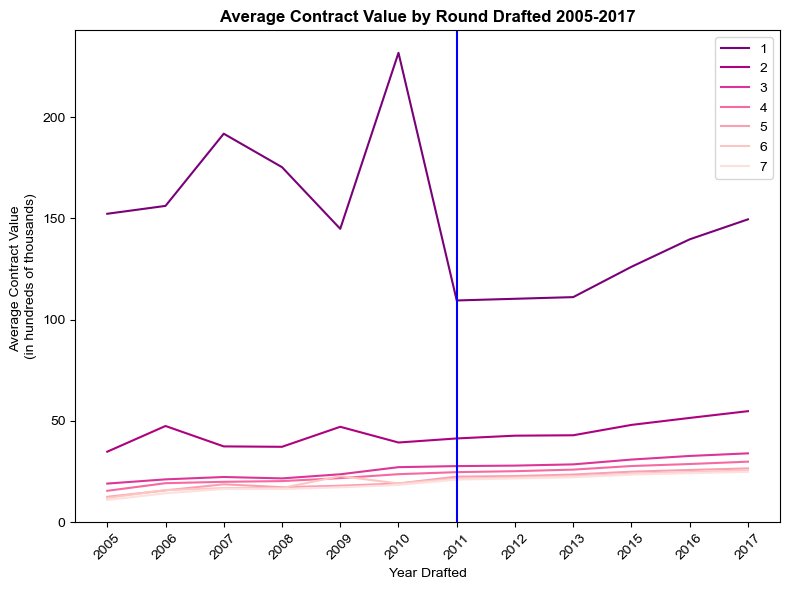

In [25]:
#I created a lineplot using seaborn with my x-value, y-value, hue and data variables all being previous from the previous data set
#I choose the palette red/purple because it had distinctive colors that stood out for each round
plt.figure(figsize=(8, 6))
round_graph = sns.lineplot(x='Year Drafted', y='Total Contract Value', hue='Round Drafted', data=round_averages, palette='RdPu_r')
plt.axvline(x='2011', color='blue', linestyle='-')
plt.ticklabel_format(axis = 'y',style = 'plain') # we specify the axis and the style
plt.xticks(rotation = 45) #rotating the ticks so that it's more easily visible
plt.ylabel('Average Contract Value \n(in hundreds of thousands)') # setting the y-axis label
plt.legend(loc='upper right') #placing the legend in the most convienint location, there was no place to put the legend without covering some data due to the size of the legend
plt.title("Average Contract Value by Round Drafted 2005-2017",fontweight='bold', fontsize=12) #I created and defined the title 

sns.set_style('white')
plt.grid(False)#remove the grid labels
plt.tight_layout()
plt.savefig(path+'LineGraphContracts.png', dpi = 300, transparent=True) #save as a transaprent PNG so it can be universally updated
plt.show()   

/var/folders/c_/xz6h41rs12g4qx2b4wrkkplm0000gn/T/ipykernel_6236/1955756482.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_comparison['Total Contract Value'] = year_comparison['Total Contract Value']/100000


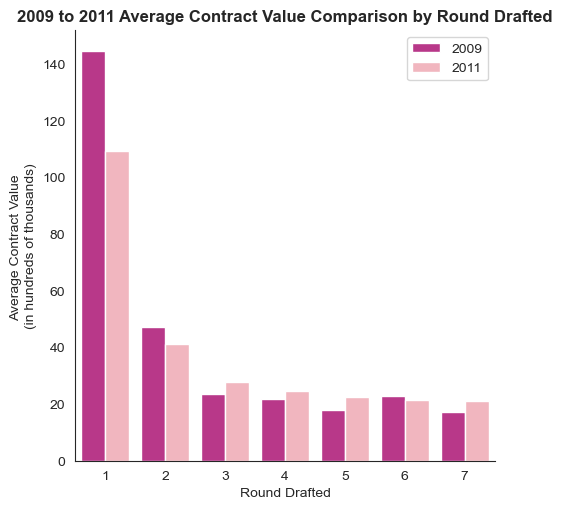

In [26]:
#filter data down to two years, the last year before the 1993 CBA and the first year under the 2010 CBA
year_comparison = Contracts[(Contracts['Year Drafted'] == '2009') | (Contracts['Year Drafted'] == '2011')]
#Select columns 'year drafted', 'round drafted' and 'total contract value' and apply the groiuping first by year then by round and finally take the mean of the total contract values for each round in years 2009 and 2001
year_averages = year_comparison[['Year Drafted','Round Drafted', 'Total Contract Value']].groupby(['Year Drafted','Round Drafted']).mean(['Total Contract Value']).reset_index()
year_averages = pd.DataFrame(year_averages)
year_averages['Total Contract Value'] = year_averages['Total Contract Value']/100000
year_comparison = Contracts[(Contracts['Year Drafted'] == '2009') | (Contracts['Year Drafted'] == '2011')]
#divide total contract value by 100000 to eliminate scientific notaiton
year_comparison['Total Contract Value'] = year_comparison['Total Contract Value']/100000

#Select columns 'year drafted', 'round drafted' and 'total contract value' and apply the groiuping first by year then by round and finally take the mean of the total contract values for each round in years 2009 and 2001
year_averages = year_comparison[['Year Drafted','Round Drafted', 'Total Contract Value']].groupby(['Year Drafted','Round Drafted']).mean(['Total Contract Value']).reset_index()

#make a categorical bar graph with each round as the x value and the contract value as the y valuw, the two columns are 2009 and 2011 and I am pulling from the year_averages data
#I sepcified that I am creating a bar graph and the color palette is a red purple pallet
sns.catplot(x = 'Round Drafted',y = 'Total Contract Value', hue= 'Year Drafted', data = year_averages, 
            kind='bar', palette='RdPu_r', legend=False)

#Set my y-axis label
plt.ylabel('Average Contract Value \n(in hundreds of thousands)')

#set my graph title with a size 12 title
plt.title("2009 to 2011 Average Contract Value Comparison by Round Drafted",fontweight='bold', fontsize=12)


#set the overall style to be white and saved my graph as a png
sns.set_style('white')
plt.grid(False)
plt.savefig(path+'BarGraphContracts.png', dpi = 300, transparent=True)

#added legend in the pre-determined best location
plt.legend(loc='best')

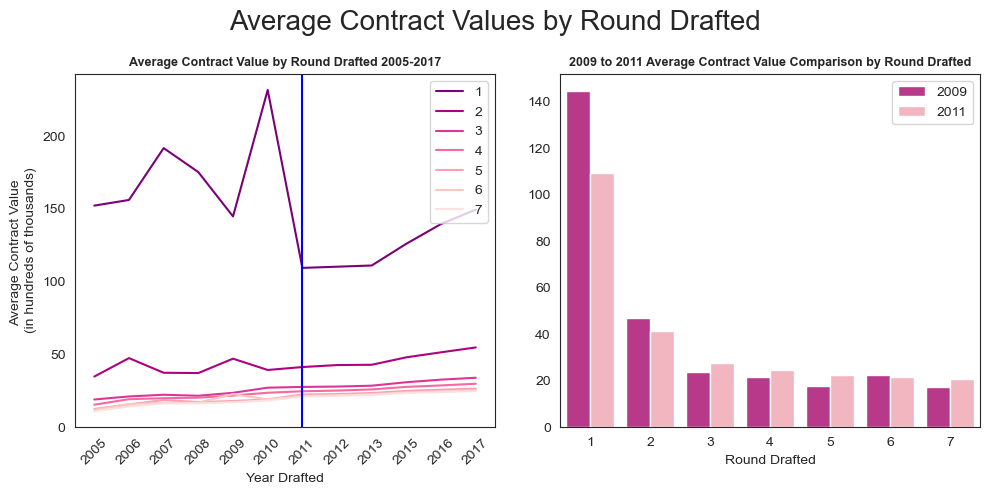

In [27]:
#This is where I merged my two figures so almost all is documented above

#name my overall figure fig and state that it is going to be a figure with 1 row and two columns with the figure size 10 x 5
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5))

sns.set_style('white')
plt.grid(False)

round_averages = Contracts[['Round Drafted','Year Drafted', 'Total Contract Value']].groupby(['Round Drafted', 'Year Drafted']).mean(['Total Contract Value']).reset_index()
round_averages['Total Contract Value'] = round_averages['Total Contract Value']/100000

#placed my line graph in the first column of my singular row
ax1 = plt.subplot(1, 2,1)

sns.lineplot(x='Year Drafted', y='Total Contract Value', hue='Round Drafted', data=round_averages, palette='RdPu_r')

plt.ticklabel_format(axis = 'y',style = 'plain') # we specify the axis and the style
plt.xticks(rotation = 45) # rotating the ticks so that it's more easily visible
plt.axvline(x='2011', color='blue', linestyle='-')

#adding a y-axis label
ax1.set_ylabel('Average Contract Value \n(in hundreds of thousands)')

#setting legend
plt.legend(loc='upper right')
#adding indivdual graph title and shrinking size so it does not overlap with my bar graph
plt.title("Average Contract Value by Round Drafted 2005-2017",fontweight='bold', fontsize=9)

#placing my bar graph in the second column of my singular row
ax2 = plt.subplot(1, 2,2)

sns.barplot(x = 'Round Drafted',y = 'Total Contract Value', hue= 'Year Drafted', data = year_averages, palette='RdPu_r')

#set my y-axis label as a blank space because both graphs share the same y-axis label
ax2.set_ylabel(' ')

#adding indivdual graph title and shrinking size so it does not overlap with my line graph
plt.title("2009 to 2011 Average Contract Value Comparison by Round Drafted",fontweight='bold', fontsize=9)
plt.legend(loc='best')

#giving the overall figure a title with the font size 20
fig.suptitle('Average Contract Values by Round Drafted', fontsize=20)
#adding tight layout to ensure no overlap
fig.tight_layout()


#saving my figure
plt.savefig(path+'AverageContracts.png', dpi = 300, transparent=True)
plt.show()

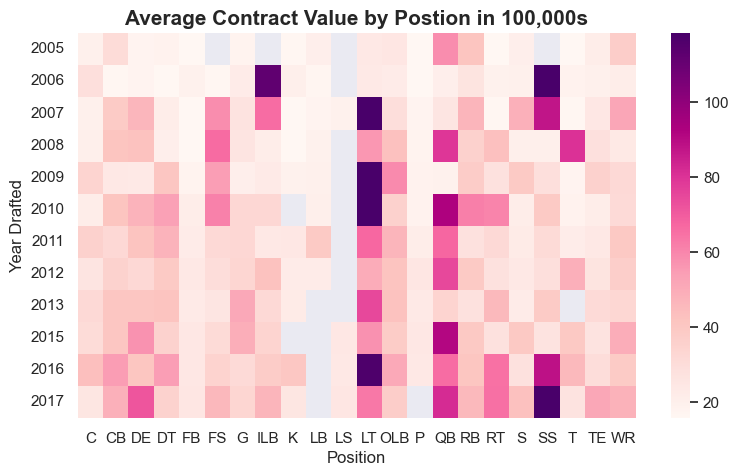

In [28]:
#select Position, Year Drafted and Total Contract Value columns, groupby Position, Year Drafted and take the average of total contract value by position
player_averages = Contracts[['Position','Year Drafted', 'Total Contract Value']].groupby(['Position','Year Drafted']).mean(['Total Contract Value']).reset_index()

#divide total contract value by 100000
player_averages['Total Contract Value'] = player_averages['Total Contract Value']/100000
player_averages = pd.DataFrame(player_averages)
#set font scale to 1
sns.set(font_scale=1)

#set heat map figure to a 9x5
plt.figure(figsize=(9,5))

#year drafted s y index, position is columns and the value I am associating with the intersection is the contract averages
hm = player_averages.pivot(index= 'Year Drafted',columns = 'Position',values = 'Total Contract Value')

#assign heat map to the visual display and give it the red purple colors
sns.heatmap(hm, cmap= "RdPu", robust= True)

plt.title("Average Contract Value by Postion in 100,000s",fontweight='bold', fontsize=15)
plt.savefig(path+'HeatMapContracts.png', dpi = 300, transparent=True)

<Figure size 1200x700 with 0 Axes>

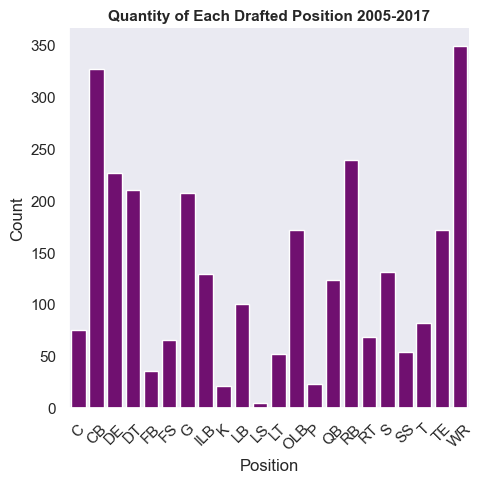

In [29]:
#select Position and Year Drafted columns, groupby Position and count how many of each position were drafted 
Position_representation = Contracts[['Position', 'Year Drafted']].groupby(['Position']).count().reset_index()
#put counted data in theyir own dataframe
Position_representation = pd.DataFrame(Position_representation)
#rename new column titles
Position_representation.columns = 'Position', 'Count'
#define figuresize
plt.figure(figsize=(12,7))

#create a barplot with position on the x axis and number of players on the y axis
# pull all of this data from the previously defined dataframe
sns.catplot(x = 'Position',y = 'Count', data = Position_representation, 
            kind='bar', color = 'Purple', legend=False)
#rotate x-axis labels
plt.xticks(rotation = 45)

#assign title
plt.title('Quantity of Each Drafted Position 2005-2017', fontweight='bold', fontsize=11)

#make background white
sns.set_style('white')
plt.grid(False)

plt.tight_layout()
#save graph
plt.savefig(path+'SampleRepresentations.png', dpi = 300, transparent=True)
plt.show()

In [30]:
Contracts['Team Cap'] = pd.to_numeric(Contracts['Team Cap'])

#select columnd year drafted and team cap
#Calculate the average of team cap for every year
Team_averages = Contracts[['Year Drafted', 'Team Cap']].groupby(['Year Drafted']).mean(['Team Cap']).reset_index()
Divide by 100000 for graph purposes
Team_averages['Team Cap'] = Team_averages['Team Cap']/100000
#set figure size
plt.figure(figsize=(10,6))

#create a lineplot of data with year on x-axis and team cap on y-axis
round_graph = sns.lineplot(x='Year Drafted', y='Team Cap', 
                           data=Team_averages, palette='RdPu_r')
#rotate x-axis labels
plt.xticks(rotation = 45)
#add linr in 2011 where new CBA was implemented
plt.axvline(x='2011', color='pink', linestyle='-')

sns.set_style('white')
plt.grid(False)

#assign figure title
plt.title('Team Cap Average 2005-2017', fontweight='bold', fontsize=12)
#save figure
plt.savefig(path+'TeamCapAverage.png', dpi = 300, transparent=True)

SyntaxError: invalid syntax (4065781129.py, line 6)